In [14]:
import pandas as pd
import numpy as np

auto = pd.read_csv('Auto.csv')

In [15]:
auto.dropna(how='any', inplace=True)

In [16]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [19]:
auto['horsepower'] = auto['horsepower'].replace('?', np.nan)
auto['horsepower'] = auto['horsepower'].astype('int')
auto.dropna(how='any', inplace=True)

In [20]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


In [21]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


The following are quantitative columns: mpg, displacement, horsepower, weight, acceleration. The remaining columns are qualitative. 

In [22]:
quantitative_columns = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

for col in quantitative_columns:
    print(f'{col}:')
    print(auto[col].min())
    print(auto[col].max())
    print('------------------------')

mpg:
9.0
46.6
------------------------
displacement:
68.0
455.0
------------------------
horsepower:
46
230
------------------------
weight:
1613
5140
------------------------
acceleration:
8.0
24.8
------------------------


In [25]:
for col in quantitative_columns:
    print(f'{col}:')
    print(auto[col].std())
    print('-------------------------')

mpg:
7.8050074865717995
-------------------------
displacement:
104.64400390890466
-------------------------
horsepower:
38.49115993282849
-------------------------
weight:
849.4025600429492
-------------------------
acceleration:
2.758864119188082
-------------------------


In [30]:
truncated_data = auto.drop(auto.index[10:90])

for col in quantitative_columns:
    print(f'{col}:')
    print('Range: ', truncated_data[col].max() - truncated_data[col].min())
    print('Mean: ', truncated_data[col].mean())
    print('Standard Dev: ', truncated_data[col].std())
    print('-----------------------')

mpg:
Range:  35.6
Mean:  24.547435897435896
Standard Dev:  7.814126450370049
-----------------------
displacement:
Range:  387.0
Mean:  185.43269230769232
Standard Dev:  98.8848202392921
-----------------------
horsepower:
Range:  184
Mean:  100.12179487179488
Standard Dev:  35.4994394138462
-----------------------
weight:
Range:  3348
Mean:  2920.4679487179487
Standard Dev:  802.8335743885862
-----------------------
acceleration:
Range:  16.3
Mean:  15.753846153846153
Standard Dev:  2.7091576179254124
-----------------------


/tmp/ipykernel_72991/3851651650.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(auto, ax=ax);


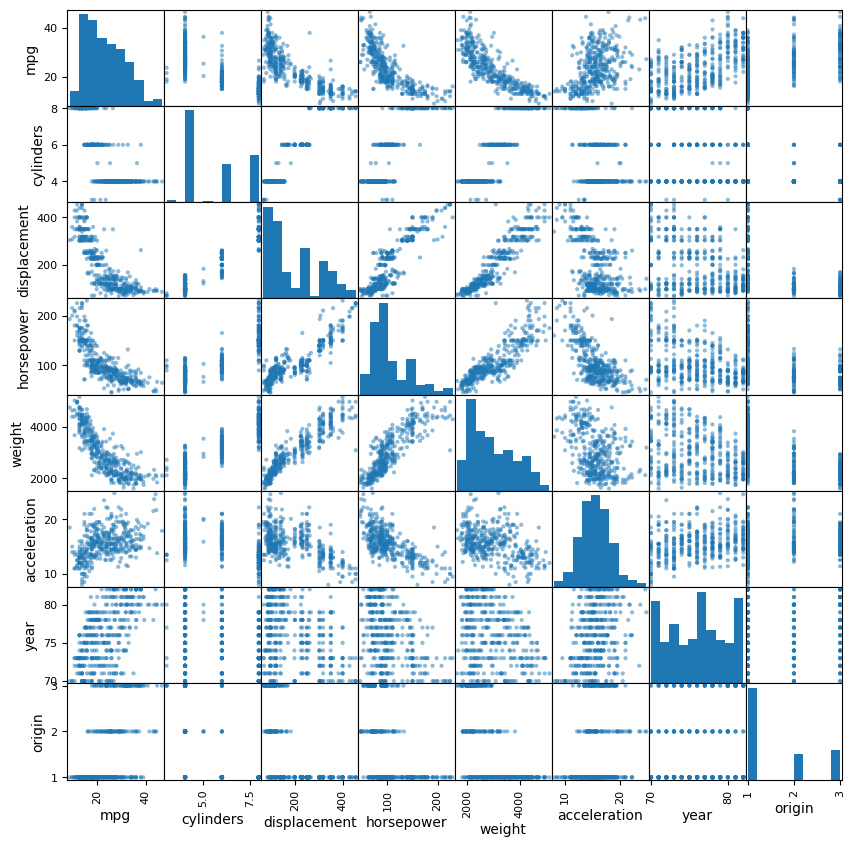

In [36]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))

pd.plotting.scatter_matrix(auto, ax=ax);
plt.show()

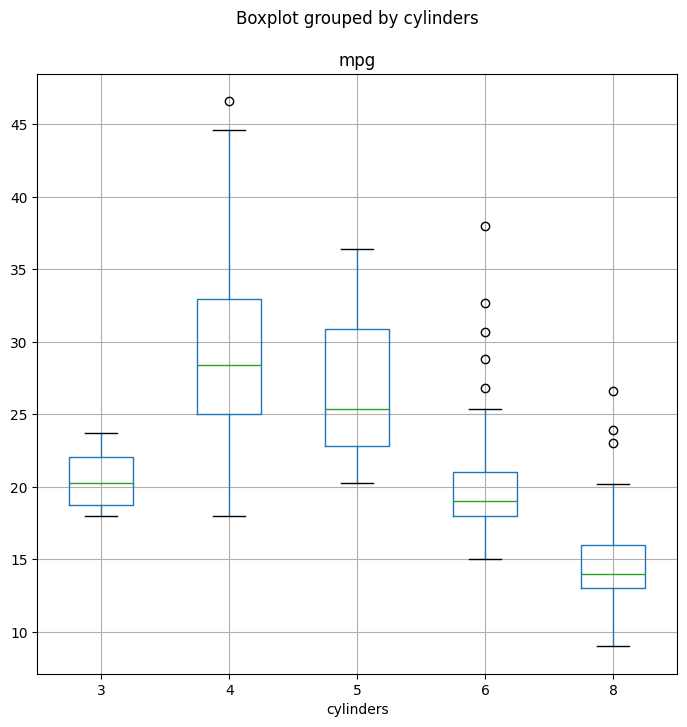

In [42]:
fig, ax = plt.subplots(figsize=(8,8))

auto.boxplot('mpg', by='cylinders', ax=ax);

It looks like horsepower is positively correlated with weight and negatively correlated with acceleration. Additionally, it seems the higher the number of cylinders, the better the gas milage.

Yes - it seem based on the boxplot above that cylinders would be a good predictor for mpg. Other good predictors look like weight, displacement, and horsepower. Though, horsepower and weight themselves could be dependent on one another so we may need to pick either or to preserve linear independence.